In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# 📌 1. 데이터 불러오기
weather_df = pd.read_csv("weather_all_data_cleaned.csv", encoding="euc-kr")
forecast_df = pd.read_csv("2026_지점별_예측_통합.csv", encoding="ISO-8859-1")

# 📌 2. forecast_df 컬럼 복구 및 날짜 처리
forecast_df.columns = [
    "일시", "평균기온(°C)", "최저기온(°C)", "최고기온(°C)",
    "일강수량(mm)", "최대 순간 풍속(m/s)", "최대 풍속(m/s)",
    "평균 풍속(m/s)", "최소 상대습도(%)", "평균 증기압(hPa)",
    "평균 현지기압(hPa)", "최저 해면기압(hPa)", "일 최심신적설(cm)",
    "평균 지면온도(°C)", "지점명"
]
forecast_df["지점명"] = forecast_df["지점명"].str.encode('latin1').str.decode('utf-8')
forecast_df["일시"] = pd.to_datetime(forecast_df["일시"])

# 📌 3. weather_df 컬럼 정리
weather_df["일시"] = pd.to_datetime(weather_df["일시"])
weather_df = weather_df[[
    "지점", "지점명", "일시", "평균기온(°C)", "최저기온(°C)", "최고기온(°C)",
    "일강수량(mm)", "최대 순간 풍속(m/s)", "최대 풍속(m/s)", "평균 풍속(m/s)",
    "최소 상대습도(%)", "평균 증기압(hPa)", "평균 현지기압(hPa)", "평균 지면온도(°C)",
    "평균 이슬점온도(°C)"
]].dropna()

# 📌 4. 학습/예측 데이터 분리
X_train = weather_df.drop(columns=["지점", "지점명", "일시", "평균 이슬점온도(°C)"])
y_train = weather_df["평균 이슬점온도(°C)"]

X_test = forecast_df[[
    "평균기온(°C)", "최저기온(°C)", "최고기온(°C)", "일강수량(mm)",
    "최대 순간 풍속(m/s)", "최대 풍속(m/s)", "평균 풍속(m/s)", "최소 상대습도(%)",
    "평균 증기압(hPa)", "평균 현지기압(hPa)", "평균 지면온도(°C)"
]]

# 📌 5. 모델 학습 및 예측
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
forecast_df["예측 평균 이슬점온도(°C)"] = model.predict(X_test)

# 📌 6. 지점별 일자별 예측 결과 정리
result_df = forecast_df[["일시", "지점명", "예측 평균 이슬점온도(°C)"]].sort_values(by=["지점명", "일시"])

result_df.to_csv("2026_이슬점온도_예측.csv", index=False, encoding="utf-8-sig")

# 📌 출력 확인
print(result_df.head())


          일시 지점명  예측 평균 이슬점온도(°C)
0 2026-01-01  고산            3.321
1 2026-01-02  고산            3.717
2 2026-01-03  고산            2.525
3 2026-01-04  고산            1.614
4 2026-01-05  고산            3.730


In [5]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

# 📌 1. 데이터 불러오기
weather_df = pd.read_csv("weather_all_data_cleaned.csv", encoding="euc-kr")
forecast_df = pd.read_csv("2026_지점별_예측_통합.csv", encoding="ISO-8859-1")

# 📌 2. forecast_df 컬럼 복구 및 날짜 처리
forecast_df.columns = [
    "일시", "평균기온(°C)", "최저기온(°C)", "최고기온(°C)",
    "일강수량(mm)", "최대 순간 풍속(m/s)", "최대 풍속(m/s)",
    "평균 풍속(m/s)", "최소 상대습도(%)", "평균 증기압(hPa)",
    "평균 현지기압(hPa)", "최저 해면기압(hPa)", "일 최심신적설(cm)",
    "평균 지면온도(°C)", "지점명"
]
# 지점명 한글 복원 및 날짜 형식 변환
forecast_df["지점명"] = forecast_df["지점명"].str.encode('latin1').str.decode('utf-8')
forecast_df["일시"] = pd.to_datetime(forecast_df["일시"])

# 📌 3. weather_df 컬럼 정리  
# (예측에 사용할 target인 '평균 상대습도(%)' 컬럼이 포함되어야 합니다)
weather_df["일시"] = pd.to_datetime(weather_df["일시"])
weather_df = weather_df[[
    "지점", "지점명", "일시", "평균기온(°C)", "최저기온(°C)", "최고기온(°C)",
    "일강수량(mm)", "최대 순간 풍속(m/s)", "최대 풍속(m/s)", "평균 풍속(m/s)",
    "최소 상대습도(%)", "평균 상대습도(%)", "평균 증기압(hPa)", "평균 현지기압(hPa)",
    "평균 지면온도(°C)"
]].dropna()

# 📌 4. 학습/예측 데이터 분리  
# 학습 시에는 target으로 '평균 상대습도(%)'를 사용하며, 나머지 수치형 변수들을 특징으로 사용합니다.
X_train = weather_df.drop(columns=["지점", "지점명", "일시", "평균 상대습도(%)"])
y_train = weather_df["평균 상대습도(%)"]

# 예측 입력값: 2026년 데이터의 동일한 feature들을 사용합니다.
X_test = forecast_df[[
    "평균기온(°C)", "최저기온(°C)", "최고기온(°C)", "일강수량(mm)",
    "최대 순간 풍속(m/s)", "최대 풍속(m/s)", "평균 풍속(m/s)",
    "최소 상대습도(%)", "평균 증기압(hPa)", "평균 현지기압(hPa)",
    "평균 지면온도(°C)"
]]

# 📌 5. 모델 학습 및 예측
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
forecast_df["예측 평균 상대습도(%)"] = model.predict(X_test)

# 📌 6. 지점별 일자별 예측 결과 정리 및 저장
result_df = forecast_df[["일시", "지점명", "예측 평균 상대습도(%)"]].sort_values(by=["지점명", "일시"])

# 예측 결과를 CSV 파일로 저장 (파일명: 2026_상대습도_예측.csv)
result_df.to_csv("2026_상대습도_예측.csv", index=False, encoding="utf-8-sig")

# 📌 결과 확인
print(result_df.head())


          일시 지점명  예측 평균 상대습도(%)
0 2026-01-01  고산         73.739
1 2026-01-02  고산         75.224
2 2026-01-03  고산         65.308
3 2026-01-04  고산         62.368
4 2026-01-05  고산         65.239


TypeError: 'RcParams' object is not callable

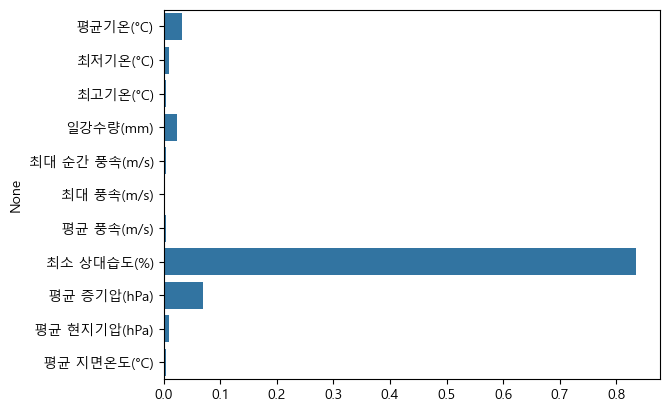

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
importances = model.feature_importances_
features = X_train.columns

sns.barplot(x=importances, y=features)
plt.rcParams('font', family='Malgun Gothic')

plt.title("Feature Importance")
plt.show()

# 평균 이슬점온도 26년도 예측

In [12]:
import pandas as pd
from sklearn.ensemble import GradientBoostingRegressor

# 📌 1. 데이터 로딩
train_df = pd.read_csv("data_for_predict.csv", encoding="euc-kr")
test_df = pd.read_csv("2026_예측.csv", encoding="utf-8")

# 📌 2. 날짜 처리 및 연도 분리
train_df["일시"] = pd.to_datetime(train_df["일시"])
train_df["연도"] = train_df["일시"].dt.year
test_df["일시"] = pd.to_datetime(test_df["일시"])

# 📌 3. 타겟 및 피처 설정
target_col = "평균 이슬점온도(°C)"
drop_cols = ["일시", "지점명", "연도", target_col]

# 학습 데이터에서 피처 및 타겟 분리
X_train = train_df.drop(columns=drop_cols, errors="ignore")
y_train = train_df[target_col]

# 테스트 데이터에서 학습과 공통된 피처만 사용
X_test = test_df[X_train.columns]  # 동일한 피처 사용

# 📌 4. 모델 학습 및 예측
model = GradientBoostingRegressor(learning_rate=0.05, max_depth=5, n_estimators=200, random_state=42)
model.fit(X_train, y_train)

test_df["예측 평균 이슬점온도(°C)"] = model.predict(X_test)

# 📌 5. 예측 결과 저장
test_df.to_csv("2026_예측_이슬점.csv", index=False, encoding="utf-8-sig")

# 예시 출력
print(test_df[["일시", "지점명", "예측 평균 이슬점온도(°C)"]].head())


          일시 지점명  예측 평균 이슬점온도(°C)
0 2026-01-01  고산         3.317344
1 2026-01-02  고산         3.668899
2 2026-01-03  고산         2.534125
3 2026-01-04  고산         1.599192
4 2026-01-05  고산         3.662042


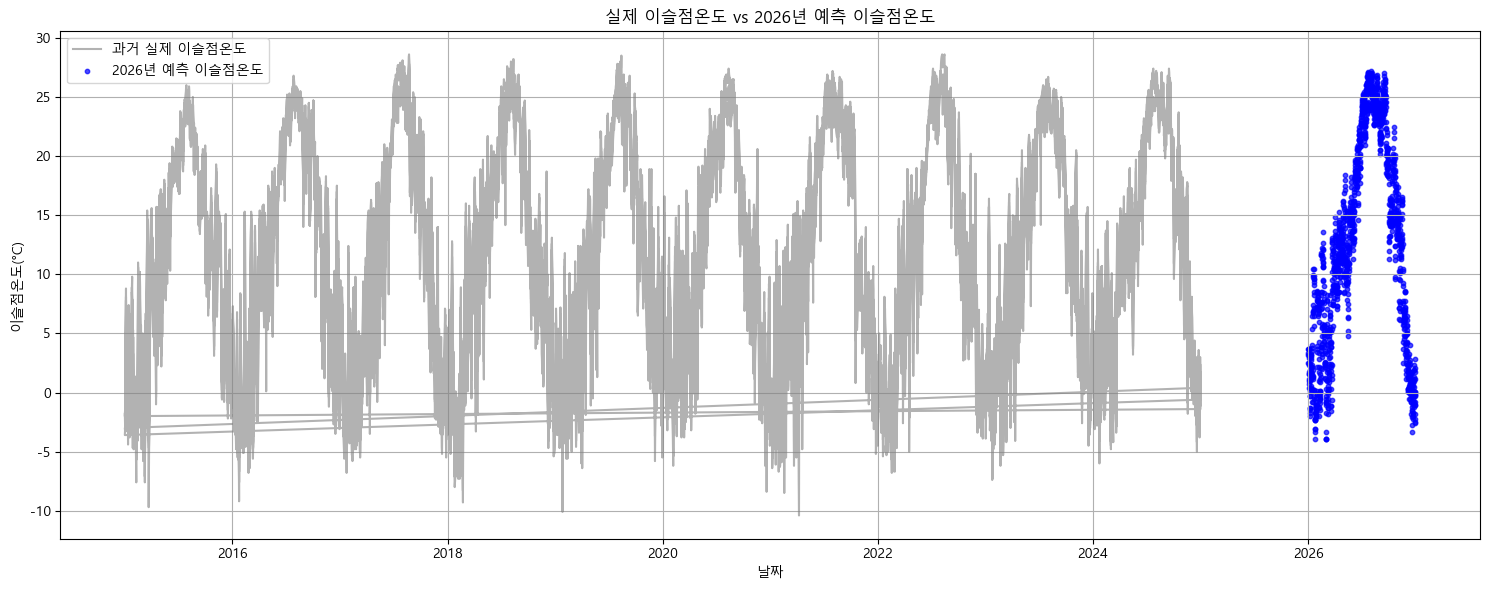

          일시 지점명  예측 평균 이슬점온도(°C)
0 2026-01-01  고산         3.317344
1 2026-01-02  고산         3.668899
2 2026-01-03  고산         2.534125
3 2026-01-04  고산         1.599192
4 2026-01-05  고산         3.662042


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor

# 📌 1. 데이터 로딩
train_df = pd.read_csv("data_for_predict.csv", encoding="euc-kr")
test_df = pd.read_csv("2026_예측.csv", encoding="utf-8")

# 📌 2. 날짜 처리 및 연도 분리
train_df["일시"] = pd.to_datetime(train_df["일시"])
train_df["연도"] = train_df["일시"].dt.year
test_df["일시"] = pd.to_datetime(test_df["일시"])

# 📌 3. 타겟 및 피처 설정
target_col = "평균 이슬점온도(°C)"
drop_cols = ["일시", "지점명", "연도", target_col]

X_train = train_df.drop(columns=drop_cols, errors="ignore")
y_train = train_df[target_col]
X_test = test_df[X_train.columns]

# 📌 4. 모델 학습 및 예측
model = GradientBoostingRegressor(learning_rate=0.05, max_depth=5, n_estimators=200, random_state=42)
model.fit(X_train, y_train)
test_df["예측 평균 이슬점온도(°C)"] = model.predict(X_test)
test_df.to_csv("2026_예측_이슬점.csv", index=False, encoding="utf-8-sig")

# 📌 5. 시각화 (실제값 vs 예측값)
plt.figure(figsize=(15, 6))

# 실제값 (라인 그래프)
plt.plot(train_df["일시"], train_df["평균 이슬점온도(°C)"], color='gray', label="과거 실제 이슬점온도", alpha=0.6)

# 예측값 (산점도)
plt.scatter(test_df["일시"], test_df["예측 평균 이슬점온도(°C)"],
            s=10, alpha=0.7, label="2026년 예측 이슬점온도", color='blue')

plt.title("실제 이슬점온도 vs 2026년 예측 이슬점온도")
plt.xlabel("날짜")
plt.ylabel("이슬점온도(°C)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 📌 6. 예시 출력
print(test_df[["일시", "지점명", "예측 평균 이슬점온도(°C)"]].head())
test_df.to_csv("이슬점온도 CSV파일", encoding ='utf8')


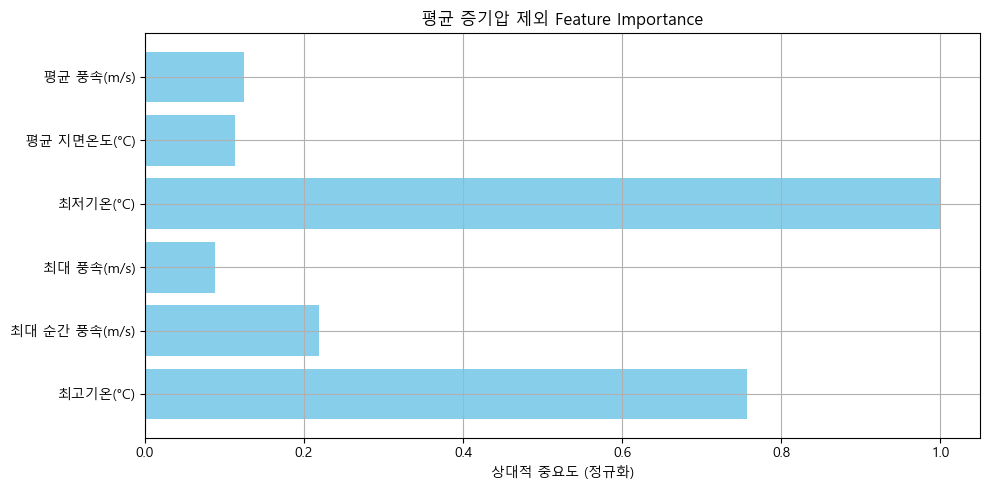

In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 한글 폰트 설정 (나눔고딕 또는 기본 폰트 사용)
plt.rcParams['font.family'] = 'Malgun Gothic'  # IPython 환경에서 호환되는 기본 폰트
plt.rcParams['axes.unicode_minus'] = False

# 평균 증기압 제외한 feature importance
filtered_importance = {
    '최고기온(°C)': 4.833369664075165e-05,
    '최대 순간 풍속(m/s)': 1.3934666176765328e-05,
    '최대 풍속(m/s)': 5.640275551256248e-06,
    '최저기온(°C)': 6.38263787709949e-05,
    '평균 지면온도(°C)': 7.246399339512165e-06,
    '평균 풍속(m/s)': 7.975432165944145e-06
}

# 정규화
normalized_filtered = {k: v / max(filtered_importance.values()) for k, v in filtered_importance.items()}

# 시각화
plt.figure(figsize=(10, 5))
plt.barh(list(normalized_filtered.keys()), list(normalized_filtered.values()), color='skyblue')
plt.xlabel("상대적 중요도 (정규화)")
plt.title("Feature Importance")
plt.grid(True)
plt.tight_layout()
plt.show()
